<a href="https://colab.research.google.com/github/venkatareddykonasani/Python_For_Data_Science/blob/main/Session4_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session4- Data Validation and Cleaning 

## Table of Contents

* Model Building Life cycle 
* Raw Data - issues
* Data Exploration – Categorical and Discrete Variables
* Data Exploration – Continuous Variables
* Data Validation 
* Data sanitizations techniques
* Standalone Imputation
* Imputation based on a target


# Model Building Life Cycle

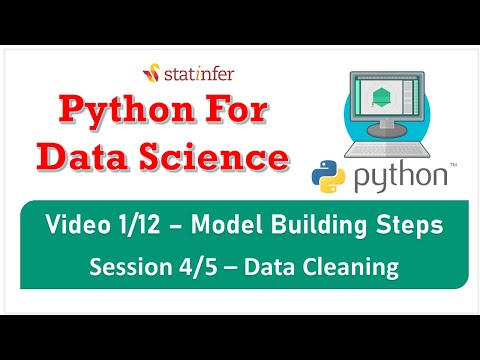

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('NVjBrtk_w4M', width=500, height=300)
# https://youtu.be/NVjBrtk_w4M 

# Raw Data Issues

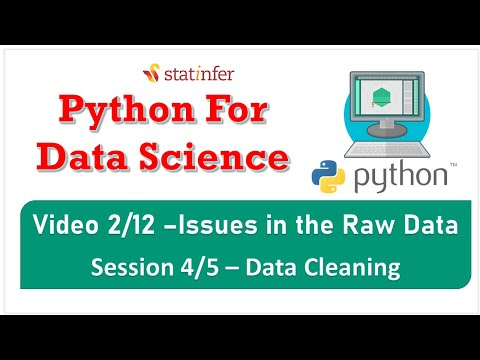

In [ ]:
YouTubeVideo('Aq7lafhZezw', width=500, height=300)
# https://youtu.be/Aq7lafhZezw 

# Data Cleaning Case Study

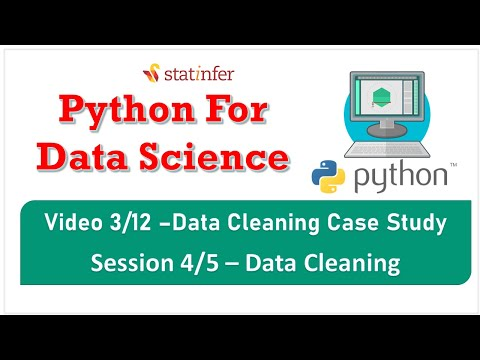

In [ ]:
YouTubeVideo('g50AdMSw5VA', width=500, height=300)
# https://youtu.be/g50AdMSw5VA 

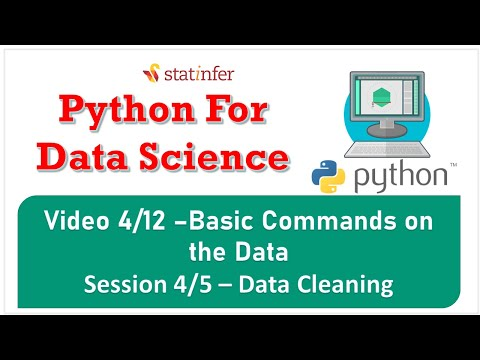

In [ ]:
YouTubeVideo('oU5ttaRorBM', width=500, height=300)
# https://youtu.be/oU5ttaRorBM 

Import Give me some Credit\cs-training.csv

In [ ]:
import pandas as pd
loans=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Give_me_some_credit_raw/cs-training.csv")

In [ ]:
#What are number of rows and columns
loans.shape

In [ ]:
#Are there any suspicious variables?
loans.columns.values

In [ ]:
#Display the variable formats
loans.dtypes

In [ ]:
#Print the first 10 observations
loans.head(10)

In [ ]:
#Do we have any unique identifier?
loans.columns.values

# Categorical variables exploration

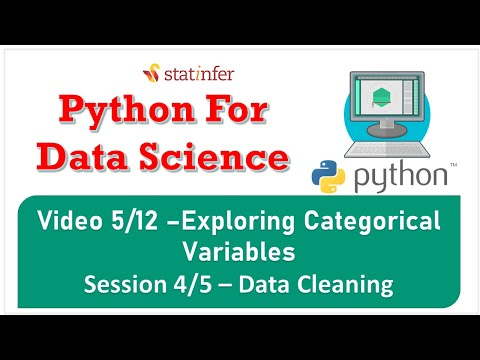

In [ ]:
YouTubeVideo('nCTN5ezhJLg', width=500, height=300)
# https://youtu.be/nCTN5ezhJLg 

In [ ]:
#What are the categorical and discrete variables? What are the continues variables.
loans.dtypes
loans.head()

In [ ]:
#Find the frequencies of all class variables in the data 
loans.columns.values

In [ ]:
loans['SeriousDlqin2yrs'].value_counts()

In [ ]:
loans['age'].value_counts(sort=False)

In [ ]:
loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(sort=False)

In [ ]:
loans['NumberOfOpenCreditLinesAndLoans'].value_counts(sort=False)

In [ ]:
loans['NumberOfTimes90DaysLate'].value_counts(sort=False)

In [ ]:
loans['NumberRealEstateLoansOrLines'].value_counts(sort=False)

In [ ]:
loans['NumberOfTime60-89DaysPastDueNotWorse'].value_counts(sort=False)

In [ ]:
loans['NumberOfDependents'].value_counts(sort=False)

In [ ]:
#Are there any   variables with missing values?
loans.isnull().sum()

In [ ]:
#List down the continuous variables
loans.dtypes
loans.head()

# Continuous variables exploration

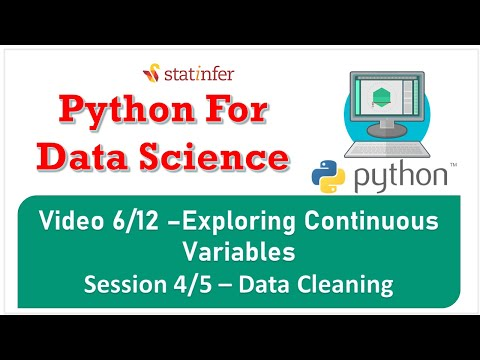

In [ ]:
YouTubeVideo('4Z-WocxuuiA', width=500, height=300)
# https://youtu.be/4Z-WocxuuiA 

## RevolvingUtilizationOfUnsecuredLines

In [ ]:
#Find summary statistics for each variable. Min, Max, Median, Mean, sd, Var
loans['RevolvingUtilizationOfUnsecuredLines'].describe()

In [ ]:
util_percentiles=loans['RevolvingUtilizationOfUnsecuredLines'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

## MonthlyIncome

In [ ]:
#Find summary statistics for each variable. Min, Max, Median, Mean, sd, Var
loans['MonthlyIncome'].describe()

In [ ]:
loans.boxplot(column="MonthlyIncome")

In [ ]:
#Find the percentage of missing values
loans['MonthlyIncome'].isnull().sum()
loans['MonthlyIncome'].isnull().sum()/len(loans)

In [ ]:
#Find Percentiles and find percentage of outliers, if any P1, p5,p10,q1(p25),q3(p75), p90,p99 
util_percentiles=loans['RevolvingUtilizationOfUnsecuredLines'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

# Overall issues in the data

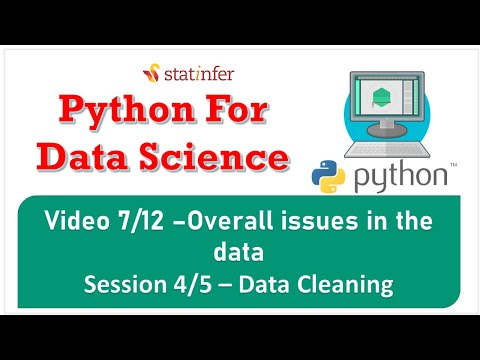

In [ ]:
YouTubeVideo('UQp0sHlMLsA', width=500, height=300)
# https://youtu.be/UQp0sHlMLsA

# Data Cleaning Scenario-1

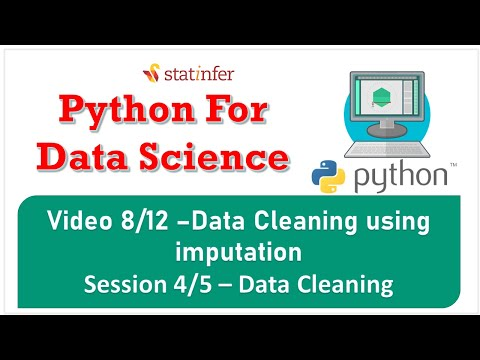

In [ ]:
YouTubeVideo('g_YdSzu90ps', width=500, height=300)
# https://youtu.be/g_YdSzu90ps

In [ ]:
util_percentiles=loans['RevolvingUtilizationOfUnsecuredLines'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

In [ ]:
median_util=loans['RevolvingUtilizationOfUnsecuredLines'].median()
median_util

In [ ]:
util_temp_bool_vect=loans['RevolvingUtilizationOfUnsecuredLines']>1
util_temp_bool_vect.value_counts()

loans['util_new']=loans['RevolvingUtilizationOfUnsecuredLines']
loans['util_new'][util_temp_bool_vect]=median_util 
loans['util_new'].describe()

In [ ]:
# percentile distribution for new variable
util_percentiles1=loans['util_new'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles1,2)


# Data Cleaning Scenario-2

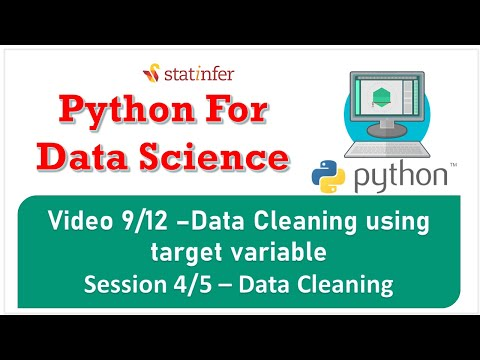

In [ ]:
YouTubeVideo('LpPTD6A_61g', width=500, height=300)
# https://youtu.be/LpPTD6A_61g

In [ ]:
freq_table_30dpd=loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(sort=False)
freq_table_30dpd

In [ ]:
#One month defaults frequency can't be beyond 24 in last 24 months
#What percent of the values are erroneous?
freq_table_30dpd[13:len(freq_table_30dpd)]
freq_table_30dpd[13:len(freq_table_30dpd)].sum()/freq_table_30dpd.sum()

In [ ]:
#Clean the variable- Look at the cross tab of variable vs target. Impute based on target .
#Cross tab with target
import pandas as pd
cross_tab_30dpd_target=pd.crosstab(loans['NumberOfTime30-59DaysPastDueNotWorse'],loans['SeriousDlqin2yrs'])
cross_tab_30dpd_target

In [ ]:
#Cross tab row Percentages
cross_tab_30dpd_target_percent=cross_tab_30dpd_target.astype(float).div(cross_tab_30dpd_target.sum(axis=1), axis=0)
round(cross_tab_30dpd_target_percent,2)

In [ ]:
#Percentage of 0 and 1 are of 98 is near to percentages of 6. 
#Replacing error values with 6

loans['num_30_59_dpd_new']=loans['NumberOfTime30-59DaysPastDueNotWorse']
loans['num_30_59_dpd_new'][loans['num_30_59_dpd_new']>12]=6
loans['num_30_59_dpd_new']

loans['num_30_59_dpd_new'].value_counts(sort=False)

# Flooring and Capping

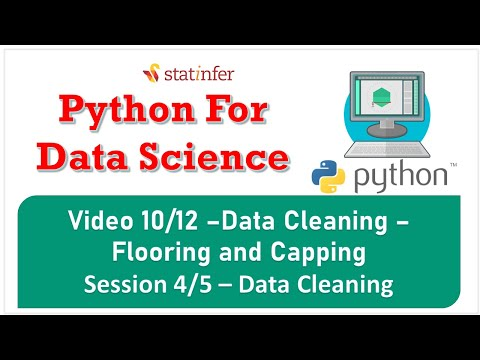

In [ ]:
YouTubeVideo('yEg48J0UoeE', width=500, height=300)
# https://youtu.be/yEg48J0UoeE

# Data Cleaning Scenario-3

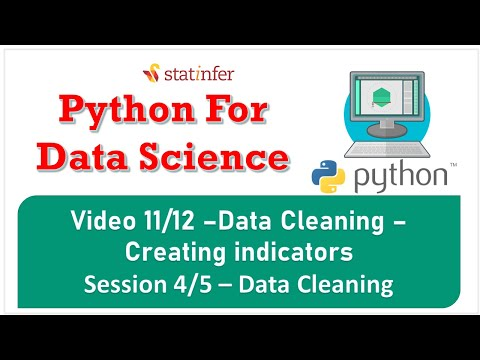

In [ ]:
YouTubeVideo('ke_-9I4kIfI', width=500, height=300)
# https://youtu.be/ke_-9I4kIfI

In [ ]:
#Find the missing value percentage in monthly income
loans['MonthlyIncome'].isnull().sum()
loans['MonthlyIncome'].isnull().sum()/len(loans)
#Once identified where missing values exist, the next task usually is to fill them (data imputation). Depending upon the context,
#in this case, I am assigning median value to all those positions where missing value is present:

In [ ]:
loans['MonthlyIncome_ind']=1
loans['MonthlyIncome_ind'][loans['MonthlyIncome'].isnull()]=0
loans['MonthlyIncome_ind'].value_counts(sort=False)

In [ ]:
loans['MonthlyIncome_new']=loans['MonthlyIncome']
loans['MonthlyIncome_new'][loans['MonthlyIncome'].isnull()]=loans['MonthlyIncome'].median()
round(loans['MonthlyIncome_new'].describe())

# Data Cleaning Assignment

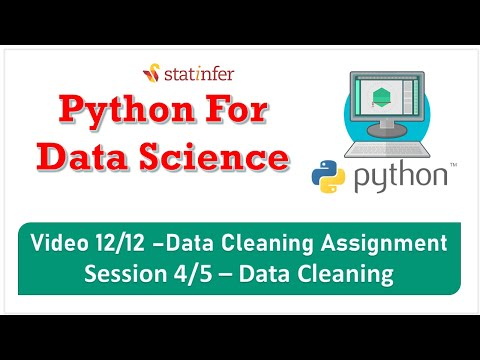

In [ ]:
YouTubeVideo('zou9DNlX4zU', width=500, height=300)
# https://youtu.be/zou9DNlX4zU

---
---
# Useful Links and Details


### Next Session Link 
[Session-5 : Objects and Functions in Python](https://colab.research.google.com/drive/1c3fp3lYTmna_sbRzFA4EH46J_CD7VT_6?usp=sharing)


### Previous Session Link
[
Session-3.2 : Data Visualizations ](https://colab.research.google.com/drive/1HQXzKILV33NRqIF_UABVIoV8dYQswLfx?usp=sharing)

### Our Full Course Details 

[Enrol Now](https://statinfer.com/course/machine-learning-with-python-course-in-india/)

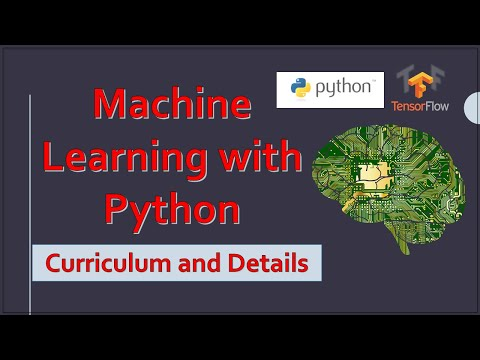

In [ ]:
YouTubeVideo('v8WvvX5DZi0', width=500, height=300)
# https://youtu.be/v8WvvX5DZi0 

[Enrol Now](https://statinfer.com/course/machine-learning-with-python-course-in-india/)

